In [26]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [18]:
data_display = pd.read_csv("dataset3_pd.csv")

data_display
# y = PD(mm)

,WL1(mm),WL2(mm),WL3(mm),WL4 (mm),WL5 (mm),Solar (W/m2),AirTemp (DegC),RH (%),y
0,53,208,87,36,44,0,21.9,97,-0.1
1,59,62,93,36,50,113,22.3,100,-0.1
2,60,61,93,36,56,152,22.8,100,-0.1
3,58,60,91,36,51,141,23.3,100,-0.1
4,57,61,91,36,48,123,23.6,99,-0.1
...,...,...,...,...,...,...,...,...,...
407,39,42,42,36,44,0,14.5,93,-0.1
408,39,42,42,36,44,0,13.9,99,-0.1
409,39,42,42,36,44,0,14.4,100,-0.1
410,39,42,42,36,44,0,14.6,98,-0.1


In [19]:
learning_rate = 0.0001
trainning_steps = 100000
display_step = 10000

w_pred = 0

In [20]:
data = np.loadtxt("dataset3_np.csv", delimiter = ',', dtype = np.float32)

x = data[:, :8]
y = data[:, [-1]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

w = tf.Variable(tf.random.uniform([8, 1], 0, 1))
bias = tf.Variable(random.random())

In [21]:
def compute_loss():
    hypothesis = w1 * x_train * x_train + w2 * x_train + bias
    loss = tf.reduce_mean((y_train - hypothesis) ** 2)
    
    return loss

optimizer = tf.optimizers.Adam(lr = learning_rate)

for step in range(1, trainning_steps + 1):
    optimizer.minimize(compute_loss, var_list = [w, bias])
    
    if step % display_step == 0:
        print('step:', step, '\n', 'w:', '\n', w.numpy(), '\n', 'bias:', bias.numpy(), 
              '\n', 'loss:', compute_loss().numpy(), '\n')
        
        w_pred = w.numpy()

step: 10000 
 w: 
 [[-0.06735857]
 [ 0.47006235]
 [-0.09832972]
 [ 0.28619573]
 [-0.1273024 ]
 [-0.01390474]
 [ 0.36595452]
 [-0.27196088]] 
 bias: -0.2941443 
 loss: 12.0973 

step: 20000 
 w: 
 [[-0.0053859 ]
 [ 0.21860665]
 [-0.07273173]
 [ 0.03051543]
 [-0.1150157 ]
 [-0.00154671]
 [ 0.04790681]
 [-0.03327835]] 
 bias: -0.43759617 
 loss: 0.6856064 

step: 30000 
 w: 
 [[ 1.7992305e-04]
 [ 3.8680292e-03]
 [-2.0690439e-03]
 [ 1.5029807e-02]
 [ 1.6064866e-03]
 [-5.8977021e-05]
 [-4.5084530e-03]
 [-8.2762737e-04]] 
 bias: -0.6515081 
 loss: 0.006543466 

step: 40000 
 w: 
 [[ 2.4873705e-04]
 [ 3.9719078e-03]
 [-2.0469932e-03]
 [ 2.1204118e-02]
 [ 5.4696002e-03]
 [-4.7482736e-05]
 [-3.8717284e-03]
 [-4.8949593e-04]] 
 bias: -1.093414 
 loss: 0.005957358 

step: 50000 
 w: 
 [[ 2.9507800e-04]
 [ 4.0471819e-03]
 [-2.0383003e-03]
 [ 2.6190609e-02]
 [ 8.5863024e-03]
 [-4.7387213e-05]
 [-3.3656433e-03]
 [-2.2507105e-04]] 
 bias: -1.4509534 
 loss: 0.0055947807 

step: 60000 
 w: 
 [[ 3.3342

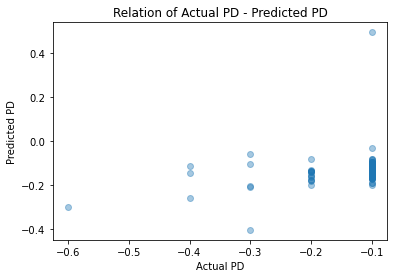

In [22]:
y_hat = tf.matmul(x_test, w_pred) + bias

plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [28]:
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)

print(rmse)

0.09456314


In [ ]:
# 학습 중간에 loss가 더 낮은 학습 set이 있었다. -> 어떻게 해결하지?